In [1]:
import os
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Softmax, InputLayer, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
dataset_path = Path('H:\mrl_dataset_3.npz').absolute().resolve()
data = np.load(str(dataset_path))
# Get the data and labels from the dataset file.
X = data['data']
y = data['labels']
data.close()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Number of samples in training dataset: {X_train.shape[0]}")
print(f"Number of samples in testing dataset : {X_test.shape[0]}")

Number of samples in training dataset: 56881
Number of samples in testing dataset : 28017


In [4]:
model = Sequential()
model.add(InputLayer(input_shape=(64, 64, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Softmax())

In [5]:
opt = Adam(learning_rate=0.0001)
loss = SparseCategoricalCrossentropy()
metrics = ['accuracy']
callback = EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        9248      
                                                        

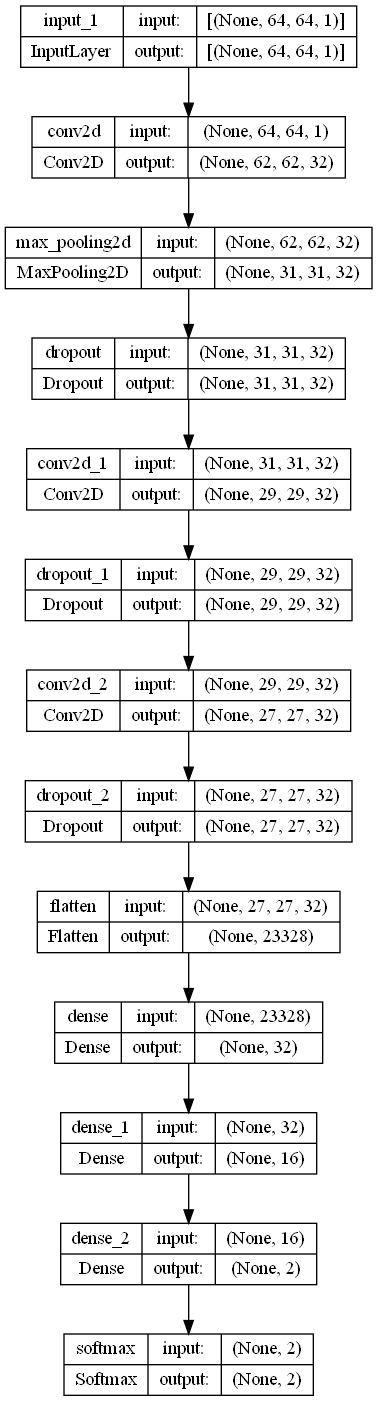

In [7]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

     ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
     ------------------------------------ - 41.0/43.2 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 43.2/43.2 kB 701.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


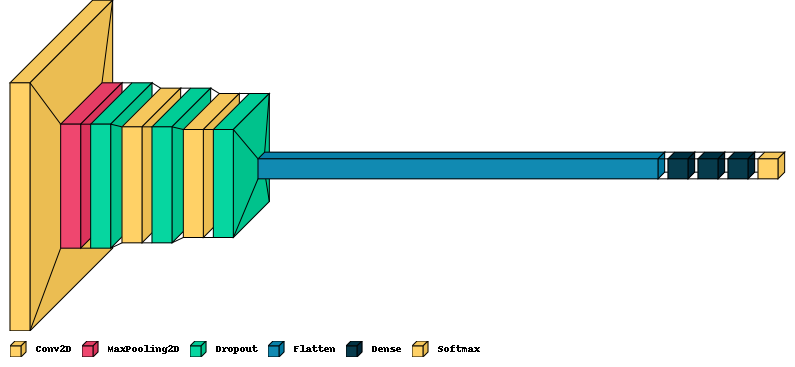

In [8]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model,legend=True)

In [9]:
from tensorflow.keras.utils import Sequence
from typing import Tuple

class DataGenerator(Sequence):
  def __init__(self, batch_size: int,
               dims: Tuple[int, int],
               data, labels):
    self.batch_size = batch_size
    self.dims = dims
    self.data = np.hstack((data, labels))
    self.nb_samples = self.data.shape[0]
    self.indexes = np.arange(self.nb_samples)
    self.on_epoch_end()

  def __len__(self):
    return self.nb_samples // self.batch_size

  def __getitem__(self, index):
    start_idx = index * self.batch_size
    end_idx = (index + 1) * self.batch_size
    data_slice = self.data[start_idx:end_idx, :]
    X = data_slice[:,0:-1].reshape(-1,*self.dims)
    y = data_slice[:,-1]
    return X, y

  def on_epoch_end(self):
    np.random.shuffle(self.data)


In [10]:
train_generator = DataGenerator(64, (64, 64, 1), X_train[:40000,:], y_train[:40000])
valid_generator = DataGenerator(32, (64, 64, 1), X_train[40000:,:], y_train[40000:])

history = model.fit(train_generator, validation_data=valid_generator, epochs=50)
#model.save('models/Drver Drowsiness  Detection CNN_64_2.h6', overwrite=True)

Epoch 1/50
625/625 [==============================] - 241s 382ms/step - loss: 0.4033 - accuracy: 0.8286 - val_loss: 0.2902 - val_accuracy: 0.8937
Epoch 2/50
625/625 [==============================] - 228s 365ms/step - loss: 0.2818 - accuracy: 0.8962 - val_loss: 0.2327 - val_accuracy: 0.9134
Epoch 3/50
625/625 [==============================] - 225s 360ms/step - loss: 0.2271 - accuracy: 0.9149 - val_loss: 0.1794 - val_accuracy: 0.9329
Epoch 4/50
625/625 [==============================] - 218s 349ms/step - loss: 0.1876 - accuracy: 0.9287 - val_loss: 0.1556 - val_accuracy: 0.9427
Epoch 5/50
625/625 [==============================] - 221s 353ms/step - loss: 0.1630 - accuracy: 0.9375 - val_loss: 0.1324 - val_accuracy: 0.9529
Epoch 6/50
625/625 [==============================] - 220s 352ms/step - loss: 0.1441 - accuracy: 0.9463 - val_loss: 0.1178 - val_accuracy: 0.9564
Epoch 7/50
625/625 [==============================] - 232s 371ms/step - loss: 0.1281 - accuracy: 0.9527 - val_loss: 0.1084 -

In [10]:
#model.save('models/Drver Drowsiness  Detection CNN_64_2.h6', overwrite=True)

INFO:tensorflow:Assets written to: models/Drver Drowsiness  Detection CNN_64_2.h6\assets


INFO:tensorflow:Assets written to: models/Drver Drowsiness  Detection CNN_64_2.h6\assets


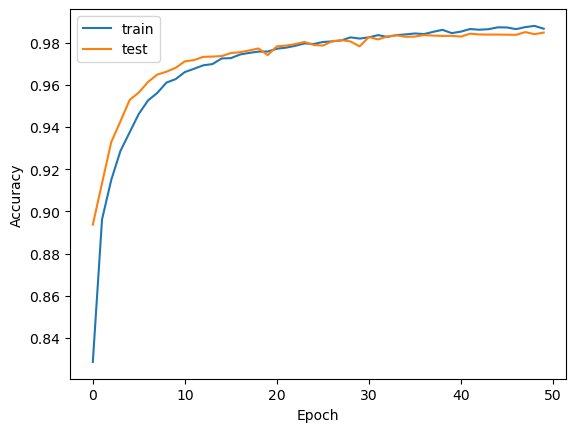

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


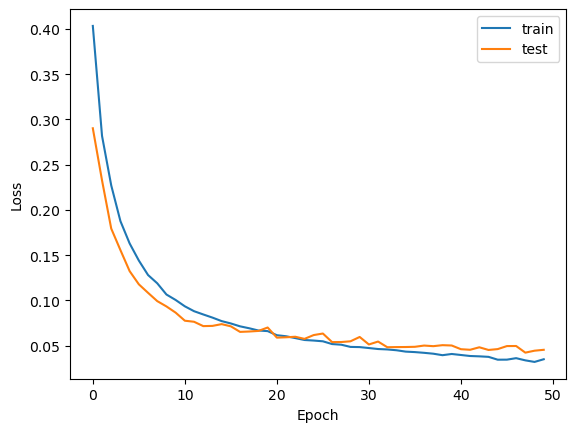

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [13]:
test_generator = DataGenerator(32, (64, 64, 1), X_test, y_test)

In [14]:
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)


Evaluate on test data
875/875 [==============================] - 33s 34ms/step - loss: 0.0453 - accuracy: 0.9848
test loss, test acc: [0.045257311314344406, 0.9847857356071472]


In [15]:
print(f"ACCURACY: {results[1] * 100:.2f} %")

ACCURACY: 98.48 %


876/876 [==============================] - 34s 37ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     13847
         1.0       0.98      0.99      0.98     14170

    accuracy                           0.98     28017
   macro avg       0.98      0.98      0.98     28017
weighted avg       0.98      0.98      0.98     28017



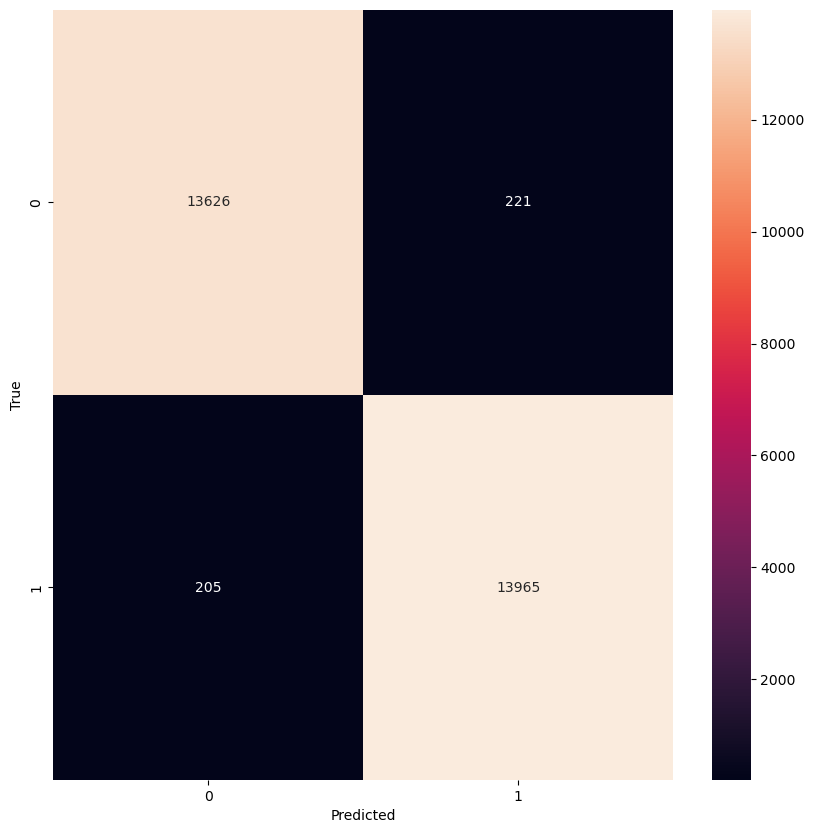

In [16]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0],64, 64, 1))

y_test_ = model.predict(X_test_reshaped)
y_pred = np.argmax(y_test_, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


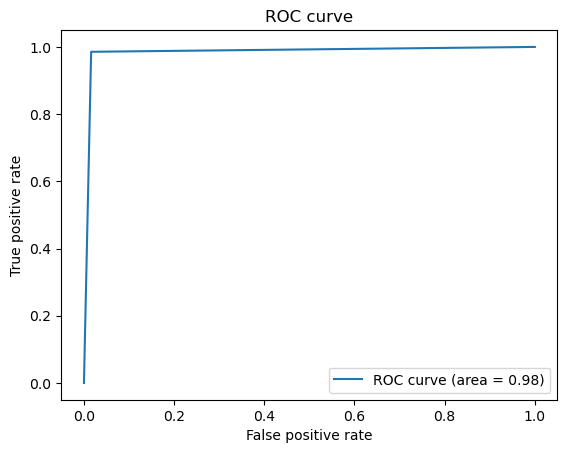

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()


In [18]:
index = np.random.choice(X_test.shape[0], 30, replace=False)
test_samples = X_test[index].reshape(-1, 64, 64, 1)

In [19]:
test_samples_preds = model.predict(test_samples)
test_samples_preds = np.argmax(test_samples_preds, axis=1)

1/1 [==============================] - 0s 93ms/step


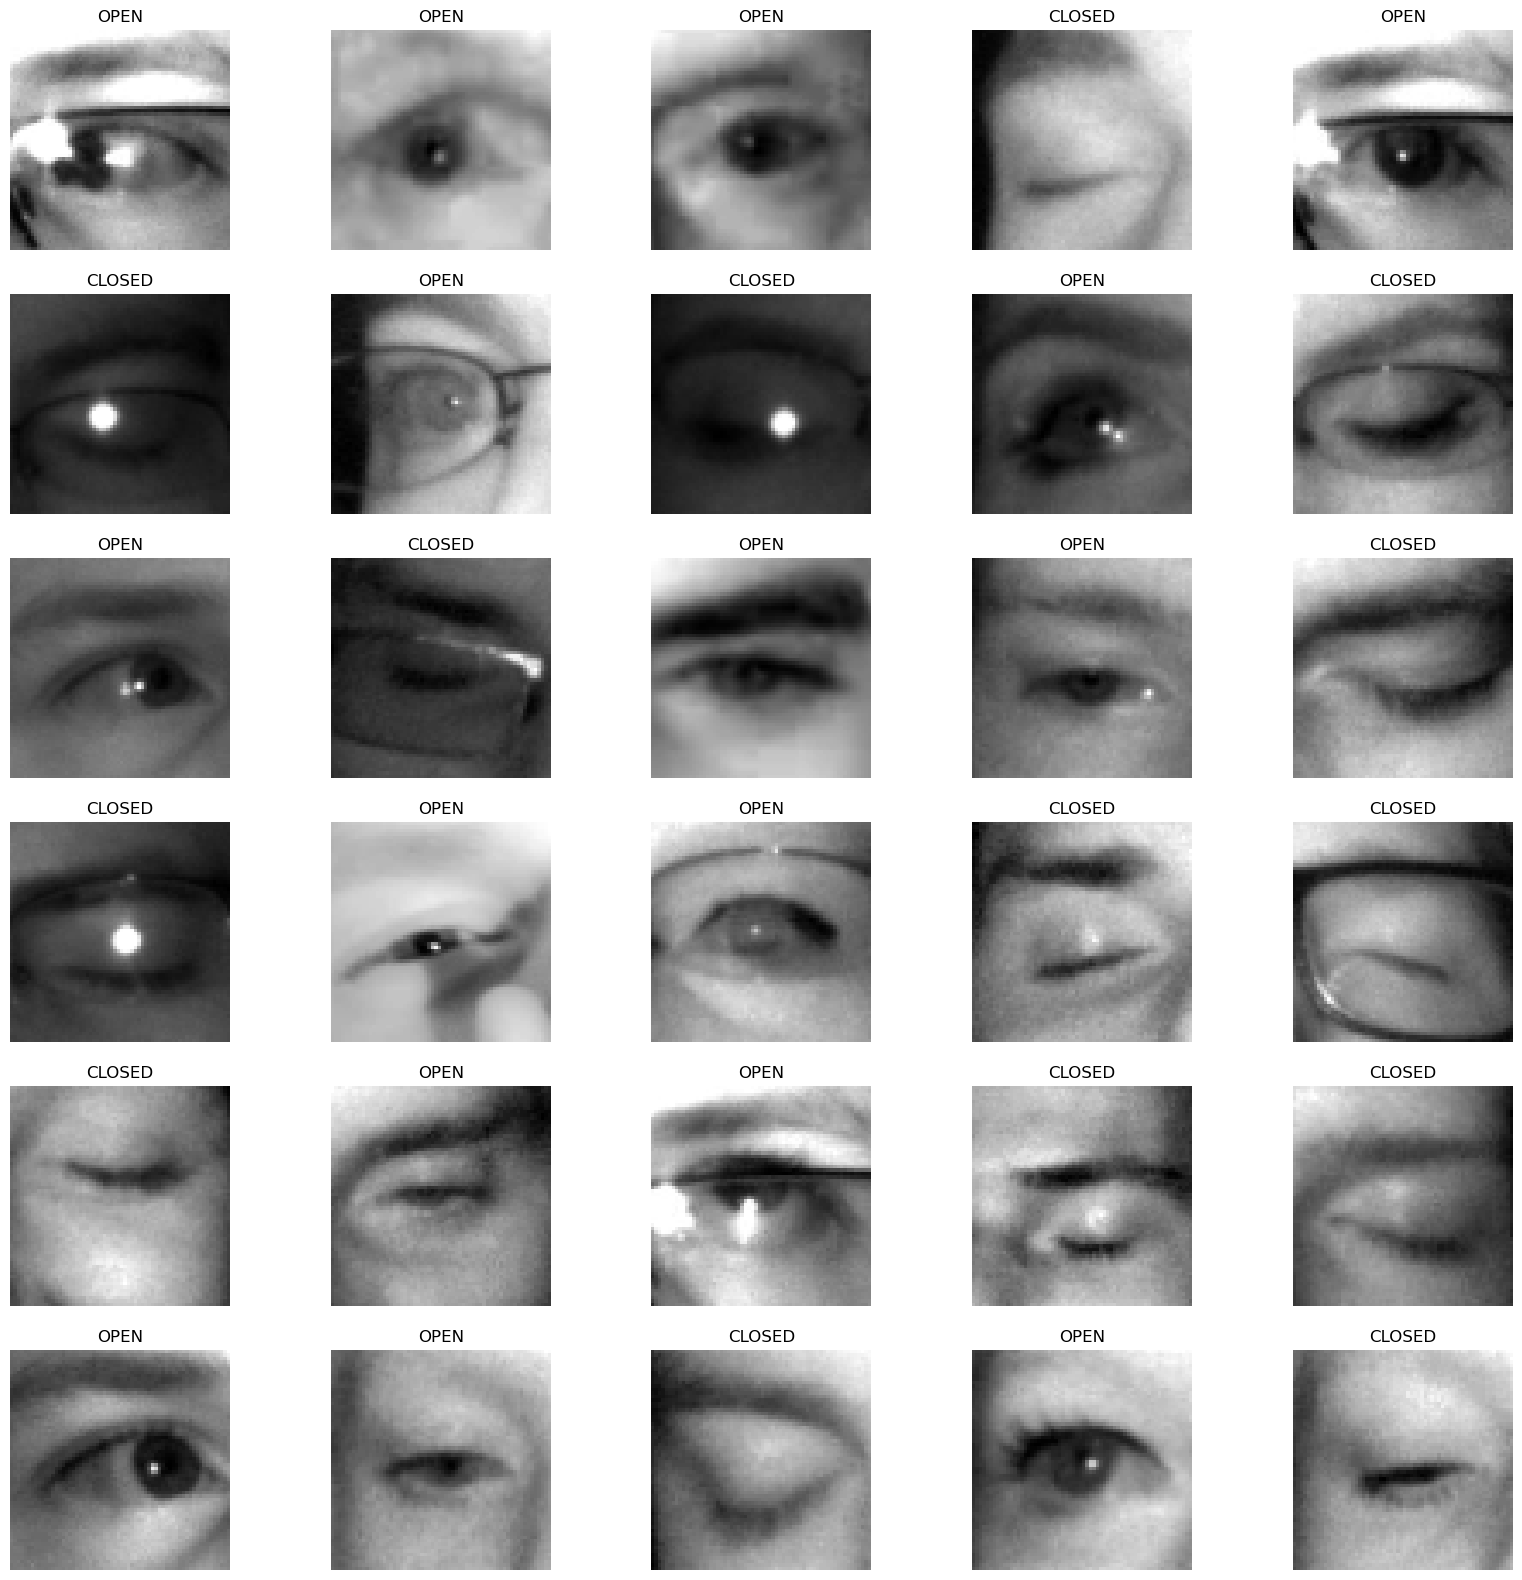

In [20]:
fig, axes = plt.subplots(6, 5)
fig.set_size_inches(20, 20)
axes = axes.flatten()
for idx, ax in enumerate(axes):
  ax.imshow(test_samples[idx, :].reshape(64, 64), cmap='gray')
  ax.axis('off')
  ax.set_title('OPEN' if test_samples_preds[idx] else 'CLOSED')
plt.show()